In [4]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

import pandas as pd
import seaborn as sns
import scipy.stats as stats

Populating the interactive namespace from numpy and matplotlib


In [5]:
scores = pd.read_csv("../data/ES_2-5_79cases_newVnames.csv")
scores.head()

,FAMILY,TCGender,FB2,Eng2,FB3,Eng3,FB4,Eng4,FB5,Eng5,...,Obs4,Act4,Car4,Hop4,Vid4,Con5,Obs5,Act5,Car5,Hop5
0,ESC319,8,5.0,4,999.0,999,4.2,4,4.200,5,...,4,4,5,5,0,5,4,4,4,4
1,ESC343,1,4.0,4,999.0,999,4.0,3,4.600,5,...,4,3,5,4,0,5,5,4,4,5
2,ESC413,1,5.8,4,6.4,7,4.4,4,5.924,9,...,5,4,5,4,0,8,8,8,8,9
3,ESC432,8,6.4,7,999.0,999,3.0,3,5.724,9,...,2,3,5,3,0,8,8,8,8,8
4,ESC452,8,3.6,4,999.0,999,5.4,6,3.800,4,...,5,5,5,6,0,5,4,4,3,3


In [6]:
liwc = pd.read_csv("../data/LIWC2015 Results (allFiles).csv")

# Obtain family name for merge w/ scores
liwc['FAMILY'] = liwc['Source (A)'].apply(lambda x: x.split()[0].split("-")[0].split("_")[0].replace("A2FB", ""))

# Replace 999 w/ nan
# TODO:

# Merge score with liwc d.f.
liwc = pd.merge(liwc, scores[['FAMILY', 'Hop2']], left_on = 'FAMILY', right_on = 'FAMILY')

liwc.head()

,Source (A),Source (B),Source (C),WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,...,relig,death,informal,swear,netspeak,assent,nonflu,filler,FAMILY,Hop2
0,ESC805A2FB_1,<EMPTY>,[0:00:00],3,92.84,50.0,1.0,25.77,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ESC805,3
1,ESC805A2FB_1,<EMPTY>,NaN,0,0.00,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ESC805,3
2,ESC805A2FB_1,<EMPTY>,[Side Conversation],2,92.84,99.0,99.0,25.77,2.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ESC805,3
3,ESC805A2FB_1,<EMPTY>,NaN,0,0.00,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ESC805,3
4,ESC805A2FB_1,<EMPTY>,[0:01:00],3,92.84,50.0,1.0,25.77,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ESC805,3


# Utterance-level analysis

By joining all 12 sessions, we got enough utterances to make some initial statistical analysis feasible. We first explore the hypothesis of differences between Therapists and clients, and then we explore correlations between variables and scores.


## Differences between therapist and other

In [7]:
# drop <EMPTY> from liwc
liwc = liwc[liwc['Source (B)'] != "<EMPTY>"]
liwc[['Source (A)', 'WC']].head()

,Source (A),WC
8,ESC805A2FB_1,62
12,ESC805A2FB_1,1
14,ESC805A2FB_1,137
20,ESC805A2FB_1,11
22,ESC805A2FB_1,4


In [8]:
therapist = ['Interviewer', 'Therapist']

# make a new column
liwc['therapist'] = False
liwc.ix[liwc['Source (B)'].isin(therapist),'therapist'] = True

liwc.drop('Source (C)', axis = 1).head()

,Source (A),Source (B),WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,...,death,informal,swear,netspeak,assent,nonflu,filler,FAMILY,Hop2,therapist
8,ESC805A2FB_1,Interviewer,62,2.36,87.06,70.28,7.28,10.33,11.29,98.39,...,0.0,3.23,0.0,3.23,0.00,0.0,0.0,ESC805,3,True
12,ESC805A2FB_1,Interviewee,1,92.84,50.00,99.00,25.77,1.00,0.00,100.00,...,0.0,0.00,0.0,0.00,0.00,0.0,0.0,ESC805,3,False
14,ESC805A2FB_1,Interviewer,137,30.25,97.94,77.57,53.20,10.54,10.95,98.54,...,0.0,3.65,0.0,1.46,2.19,0.0,0.0,ESC805,3,True
20,ESC805A2FB_1,Interviewee,11,79.25,18.16,85.21,25.77,11.00,0.00,90.91,...,0.0,9.09,0.0,9.09,0.00,0.0,0.0,ESC805,3,False
22,ESC805A2FB_1,Interviewer,4,37.39,50.00,1.00,25.77,2.00,0.00,100.00,...,0.0,25.00,0.0,0.00,25.00,0.0,0.0,ESC805,3,True


### Speaker turns and number of words
We already know that for most of the sessions, the therapist speaks about half of the time. We just need to make sure this is still happening. Moreover, we can now check the percentage of words spoken by each party. And correlate that with the scores per session.

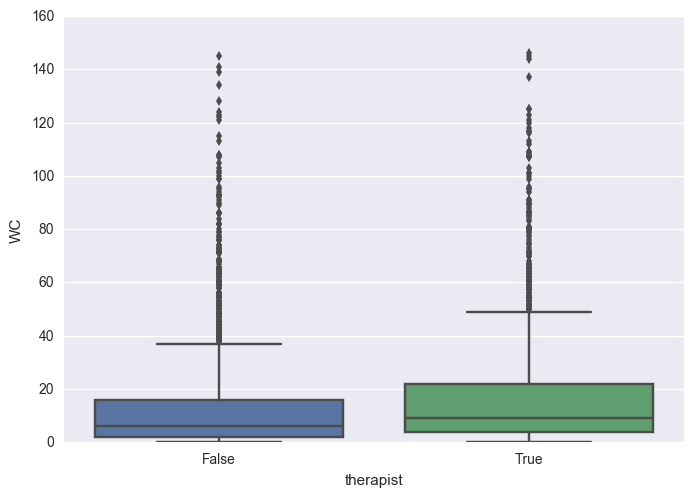

In [9]:
#TODO: speaker turns
sns.boxplot(x = "therapist", y = "WC", data = liwc);

Since we cannot be certain that the sampled populations have the same variance (Levene's test, $p < 0.01$), there is no point in performing a t-test. Thus, we perform a non-parametric Mann-Whitney test. The differences in medians between the __word count__ of therapists and clients is signficant ($p < 0.001$).

In [10]:
therapist_d = liwc[liwc.therapist == True]['WC']
other_d = liwc[liwc.therapist != True]['WC']


# Check for equal variances
stats.levene(therapist_d, other_d, center = 'mean')

LeveneResult(statistic=14.490406795748491, pvalue=0.00014280211657717796)

In [11]:
stats.mannwhitneyu(therapist_d, other_d)

MannwhitneyuResult(statistic=1962065.0, pvalue=1.4379079187044896e-23)

In [12]:
# Spearman's correlation w/ score
stats.spearmanr(therapist_d, liwc.ix[liwc.therapist == True, 'Hop2'])

SpearmanrResult(correlation=0.047646407521116992, pvalue=0.033916057984101973)

## Differences in the psycholinguistics
We also talked about differences in the first person pronoun.

### First-person pronoun

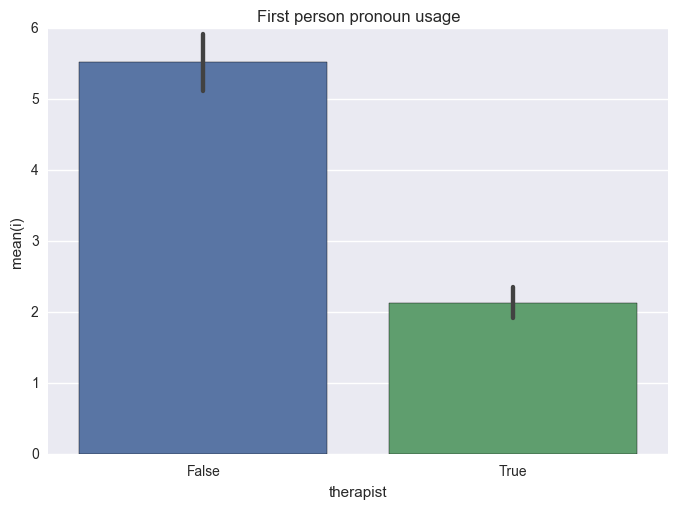

In [13]:
sns.barplot(x = "therapist", y = "i", data = liwc);
plt.title("First person pronoun usage");

In [14]:
therapist_d = liwc[liwc.therapist == True]['i']
other_d = liwc[liwc.therapist != True]['i']

# Check for equal variances
stats.levene(therapist_d, other_d, center = 'mean')

LeveneResult(statistic=420.68852511402645, pvalue=2.4319840892263617e-89)

In [15]:
stats.mannwhitneyu(therapist_d, other_d)

MannwhitneyuResult(statistic=1951755.0, pvalue=9.3204489146939654e-34)

In [17]:
# Spearman's correlation w/ score
stats.spearmanr(therapist_d, liwc.ix[liwc.therapist == True, 'Hop2'])

SpearmanrResult(correlation=0.032775801144241605, pvalue=0.14466454208945967)

### Second person pronoun
Well...well...well... The therapist is the only one who uses the 2nd person pronoun, which in foresight was to be expected.

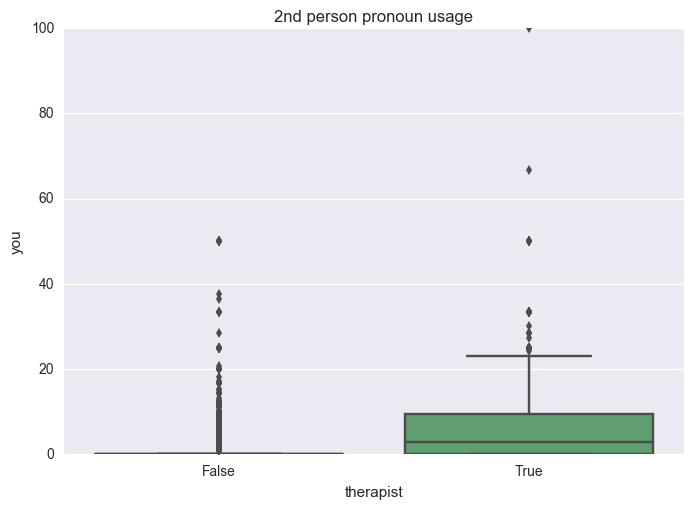

In [18]:
sns.boxplot(x = "therapist", y = "you", data = liwc);
plt.title("2nd person pronoun usage");

In [19]:
therapist_d = liwc[liwc.therapist == True]['you']

# Spearman's correlation w/ score
stats.spearmanr(therapist_d, liwc.ix[liwc.therapist == True, 'Hop2'])

SpearmanrResult(correlation=-0.025439027371705943, pvalue=0.25763211079397685)

### Positive Emotion

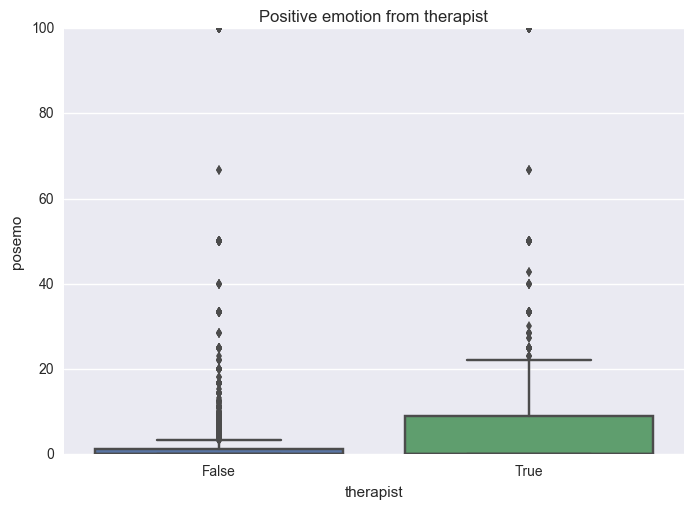

In [54]:
sns.boxplot(x = "therapist", y = "posemo", data = liwc);
plt.title("Positive emotion from therapist");

In [55]:
therapist_d = liwc[liwc.therapist == True]['posemo']
other_d = liwc[liwc.therapist != True]['posemo']

# Check for equal variances
stats.levene(therapist_d, other_d, center = 'mean')

LeveneResult(statistic=64.642210800095796, pvalue=1.1459254106777217e-15)

In [56]:
stats.mannwhitneyu(therapist_d, other_d)

MannwhitneyuResult(statistic=1828056.5, pvalue=3.9229260418245596e-53)

In [57]:
# Spearman's correlation w/ score
stats.spearmanr(therapist_d, liwc.ix[liwc.therapist == True, 'Hop2'])

SpearmanrResult(correlation=-0.11956526620179338, pvalue=9.3559427430781076e-08)

### Negative Emotion
What?? Why isn't there any negative emotion in the data? 

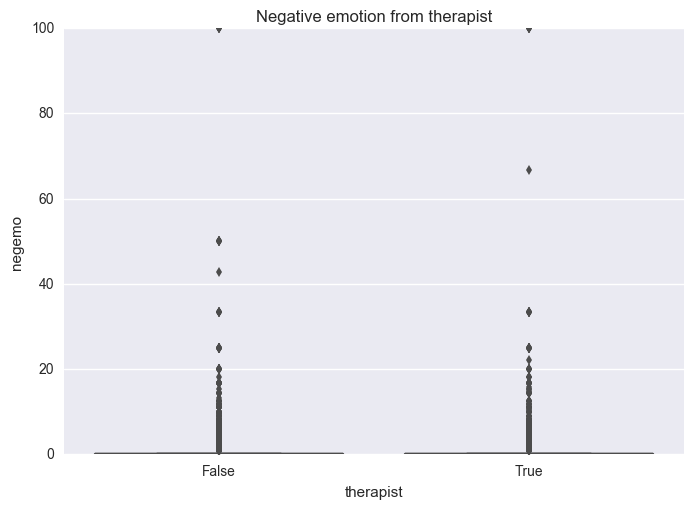

In [58]:
sns.boxplot(x = "therapist", y = "negemo", data = liwc);
plt.title("Negative emotion from therapist");